      Month  Green Fodder given \nto in milk  Dry Fodder given to\n in milk  \
0     April                               33                            3.0   
1      May                                30                            4.0   
2       Jun                               33                            3.0   
3      July                               33                            3.0   
4       Aug                               35                            2.5   
...     ...                              ...                            ...   
5938  April                               33                            4.0   
5939    Feb                               34                            6.0   
5940    Sep                               34                            3.0   
5941    Aug                               36                            3.0   
5942  April                               33                            3.0   

       Max T   Min T   Mean T      RH  Rainfall    

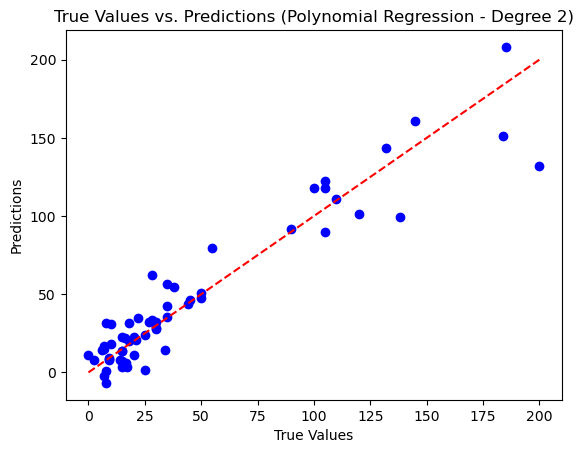

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

print(data2)
# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(X2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
X2 = X2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
X2 = X2.join(encoded_data2)

# Convert all column names to strings
X2.columns = X2.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial feature transformation
degree = 2  # You can adjust this hyperparameter
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create and train the Polynomial Regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg_model.predict(X_test_poly)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs. Predictions (Polynomial Regression - Degree {degree})')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(X2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
X2 = X2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
X2 = X2.join(encoded_data2)

# Convert all column names to strings
X2.columns = X2.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial feature transformation
degree = 0  # You can adjust this hyperparameter
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create and train the Polynomial Regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg_model.predict(X_test_poly)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs. Predictions (Polynomial Regression - Degree {degree})')
plt.show()


ValueError: could not broadcast input array from shape (5883,43) into shape (5883,0)

Root Mean Squared Error: 16.364645044547096
R-squared: 0.8926612088231236


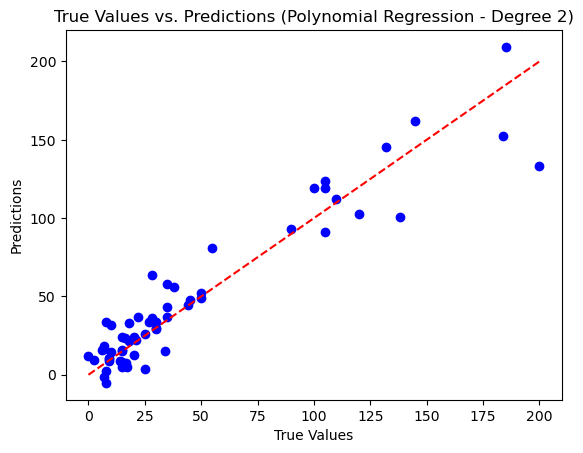

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge  # Use Ridge regression for regularization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(X2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
X2 = X2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
X2 = X2.join(encoded_data2)

# Convert all column names to strings
X2.columns = X2.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial feature transformation
degree = 2  # You can adjust this hyperparameter
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create and train the Polynomial Regression model with Ridge regularization
alpha = 0.02  # You can adjust this regularization strength
poly_reg_model = Ridge(alpha=alpha)
poly_reg_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg_model.predict(X_test_poly)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs. Predictions (Polynomial Regression - Degree {degree})')
plt.show()



R-squared: 0.09343381403347817
Mean Squared Error: 23.028628157983203


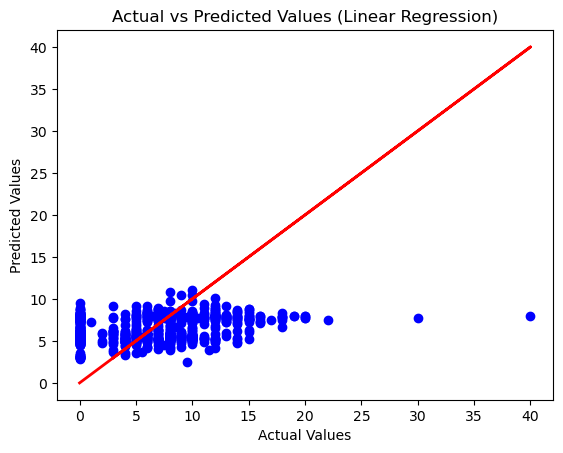

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
data = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data.fillna(0, inplace=True)

# Identify and label encode categorical columns if any
object_cols = data.select_dtypes(include=['object']).columns
for col in object_cols:
    data[col] = data[col].astype('category').cat.codes

# Split the data into features (X) and target (y) variables
X = data.drop(columns=['Milk Production/Day'])
y = data['Milk Production/Day']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Regression with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Train Ridge Regression model with regularization
ridge = Ridge(alpha=0.1)  # Adjust alpha parameter for regularization strength
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
# Visualization plot
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()


R^2 score: 0.045251617812181566
Mean Squared Error: 21.601930345562778
Root Mean Squared Error: 4.647787682926445


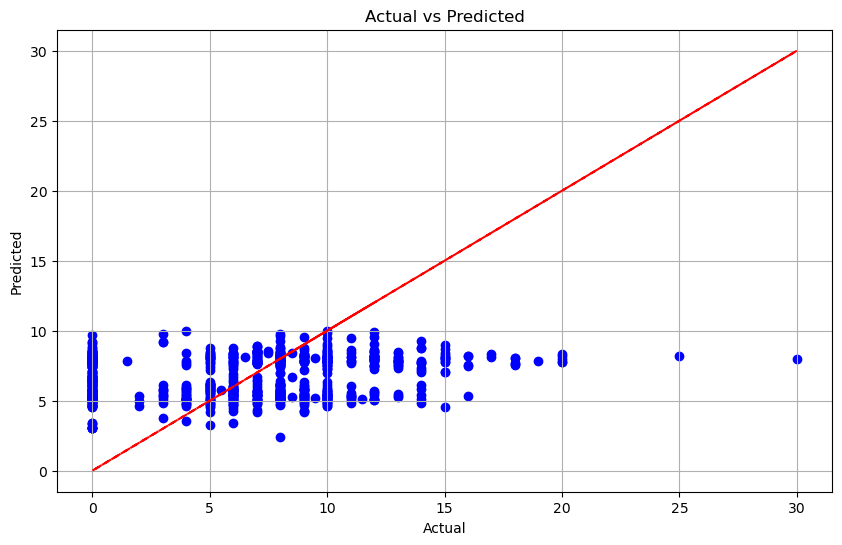

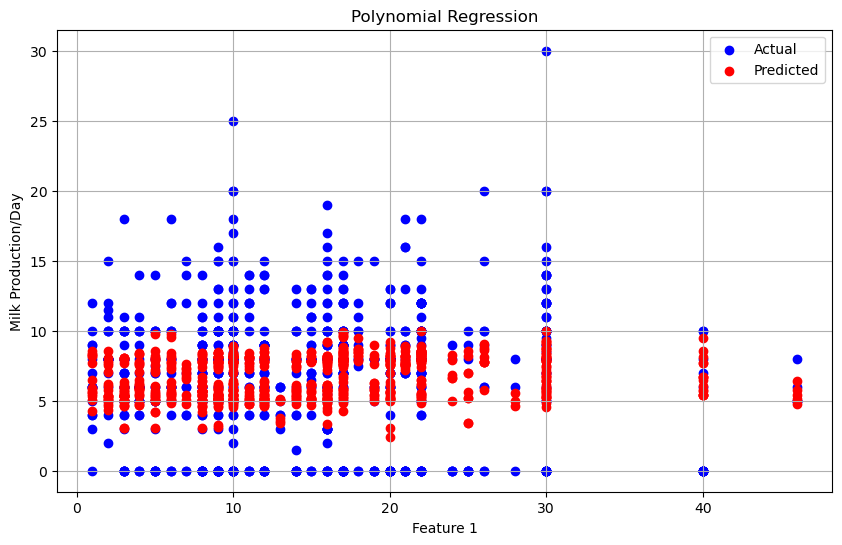

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data1 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")

# One-hot encoding for categorical variable
encoder = OneHotEncoder()
encoded_data1 = pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

# Separate target variable
Y1_ = data1['Milk Production/Day']
data1 = data1.drop(['Breed','Milk Production/Day'], axis=1)

# Combine encoded data and target variable
data1 = data1.join(encoded_data1)
data1 = data1.join(Y1_)

# Convert to numpy arrays
data1 = data1.to_numpy()
X1 = data1[:,0:-1]
Y1 = data1[:,-1]

# Split data into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

# Polynomial Regression
poly = PolynomialFeatures(degree=1, include_bias=True)
x_train_trans = poly.fit_transform(X1_train)
x_test_trans = poly.transform(X1_test)

# Train the model
lr = LinearRegression()
lr.fit(x_train_trans, Y1_train)
y_pred = lr.predict(x_test_trans)

# Model evaluation
r_squared = r2_score(Y1_test, y_pred)
mse = mean_squared_error(Y1_test, y_pred)
rmse = np.sqrt(mse)
print("R^2 score:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(Y1_test, y_pred, color='blue')
plt.plot(Y1_test, Y1_test, color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X1_test[:, 0], Y1_test, color='blue', label='Actual')
plt.scatter(X1_test[:, 0], y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Feature 1')
plt.ylabel('Milk Production/Day')
plt.legend()
plt.grid(True)
plt.show()



Mean Squared Error (Polynomial Regression): 22.51490062542547
R-squared (Polynomial Regression): 0.11365768523508968
Root Mean Squared Error (Polynomial Regression): 4.744986894125786


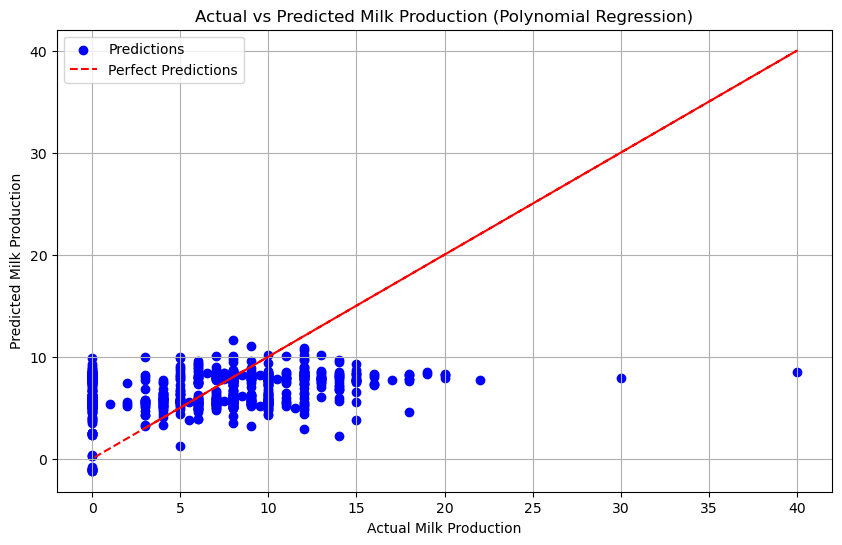

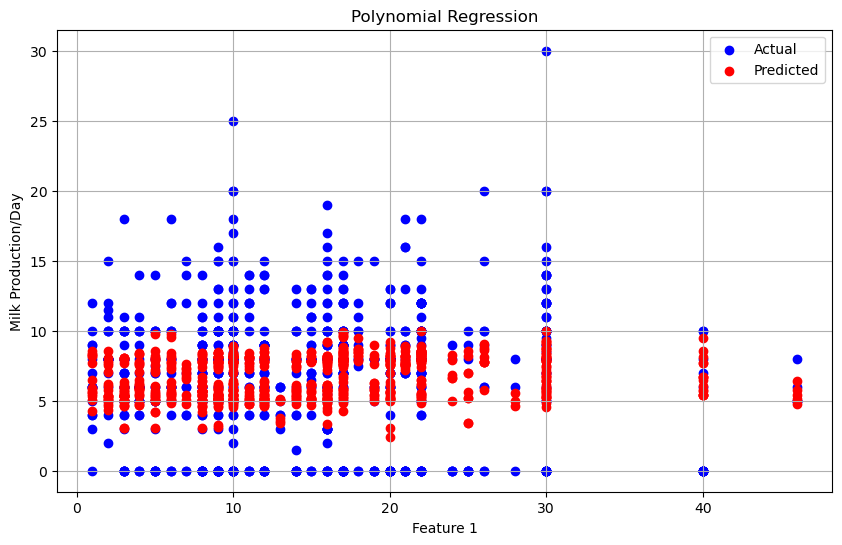

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from Excel
data = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")
data.fillna(0, inplace=True)

# Identify columns with non-numeric values
object_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables
data = pd.get_dummies(data, columns=object_cols, drop_first=True)

# Split the data into features (X) and target (y) variables
X = data.drop(columns=['Milk Production/Day'])
y = data['Milk Production/Day']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create polynomial features and train a linear regression model
poly_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=best_alpha))
poly_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_test_scaled)

# Calculate Mean Squared Error and R-squared for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'\nMean Squared Error (Polynomial Regression): {mse_poly}')
print('R-squared (Polynomial Regression):', r2_poly)

# Calculate Root Mean Squared Error (RMSE) for Polynomial Regression
rmse_poly = np.sqrt(mse_poly)
print(f'Root Mean Squared Error (Polynomial Regression): {rmse_poly}')

# Visualization plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual Milk Production')
plt.ylabel('Predicted Milk Production')
plt.title('Actual vs Predicted Milk Production (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X1_test[:, 0], Y1_test, color='blue', label='Actual')
plt.scatter(X1_test[:, 0], y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Feature 1')
plt.ylabel('Milk Production/Day')
plt.legend()
plt.grid(True)
plt.show()



R^2 score (Linear Regression): 0.045251617812181344
Mean Squared Error (Linear Regression): 21.60193034556278
Root Mean Squared Error (Linear Regression): 4.647787682926446


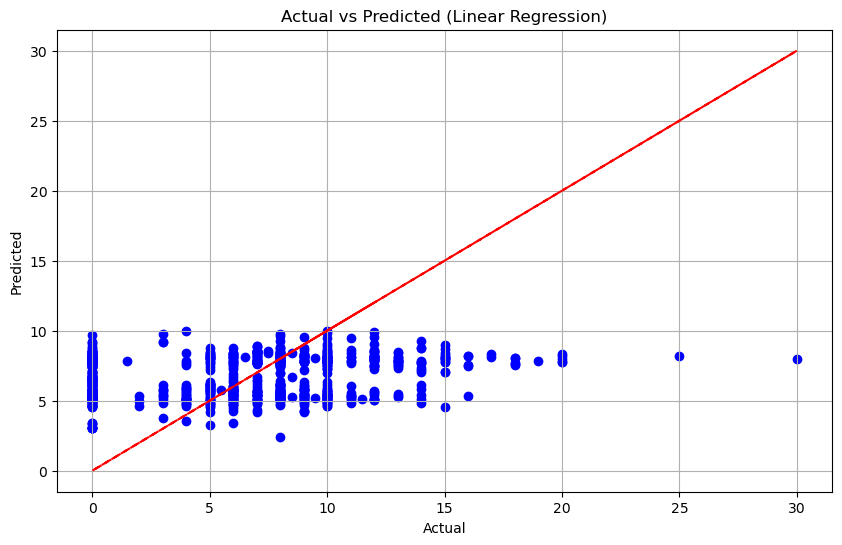

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data1 = pd.read_excel(r'C:\Users\user\Music\CP302-main1\Processed Data\Intrinsic Data.xlsx', sheet_name=0, usecols="B:E,H:I")

# One-hot encoding for categorical variable
encoder = OneHotEncoder()
encoded_data1 = pd.DataFrame(encoder.fit_transform(data1[['Breed']]).toarray())

# Separate target variable
Y1_ = data1['Milk Production/Day']
data1 = data1.drop(['Breed','Milk Production/Day'], axis=1)

# Combine encoded data and target variable
data1 = data1.join(encoded_data1)
data1 = data1.join(Y1_)

# Convert to numpy arrays
data1 = data1.to_numpy()
X1 = data1[:,0:-1]
Y1 = data1[:,-1]

# Split data into train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

# Linear Regression without polynomial features
lr_linear = LinearRegression()
lr_linear.fit(X1_train, Y1_train)
y_pred_linear = lr_linear.predict(X1_test)

# Model evaluation
r_squared_linear = r2_score(Y1_test, y_pred_linear)
mse_linear = mean_squared_error(Y1_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("R^2 score (Linear Regression):", r_squared_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("Root Mean Squared Error (Linear Regression):", rmse_linear)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(Y1_test, y_pred_linear, color='blue')
plt.plot(Y1_test, Y1_test, color='red', linestyle='--')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


Root Mean Squared Error: 19.715663827154838
R-squared: 0.8442004032280077


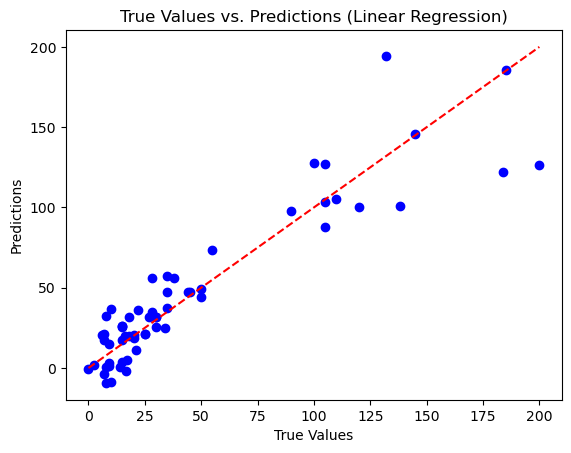

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset from Excel
file_path = r'C:\Users\user\Music\CP302-main1\Processed Data\Extrinsic Data.xlsx'
data2 = pd.read_excel(file_path, sheet_name=0, usecols="B:P")

# Assuming 'Farm Milk Production per \nDay' is the target variable
Y2_ = data2['Farm Milk Production per \nDay']
X2 = data2.drop(['Farm Milk Production per \nDay'], axis=1)

# One-hot encode categorical variables
encoder = OneHotEncoder()
encoded_data2 = pd.DataFrame(encoder.fit_transform(X2[['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder']]).toarray())

# Combine the encoded data with the original dataset
X2 = X2.drop(['Month', 'District', 'Zone', 'Green \nFodder', 'Dry\n Fodder'], axis=1)
X2 = X2.join(encoded_data2)

# Convert all column names to strings
X2.columns = X2.columns.astype(str)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_, test_size=0.01, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse}')
print('R-squared:', r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions (Linear Regression)')
plt.show()
